/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_1692/1976847977.py:70: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_class_data = class_data[correct_class_data != class_data]


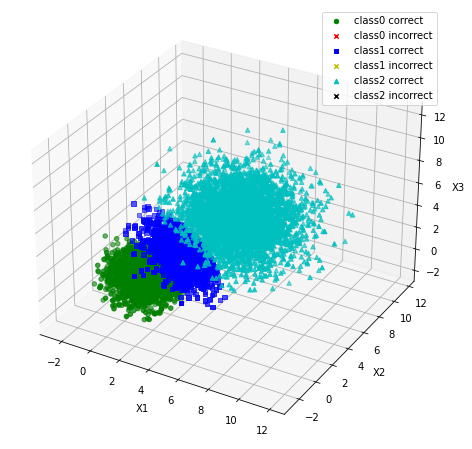

Confusion Matrix:
[[2609  415    0]
 [ 123 1483 1390]
 [   2  126 3852]]


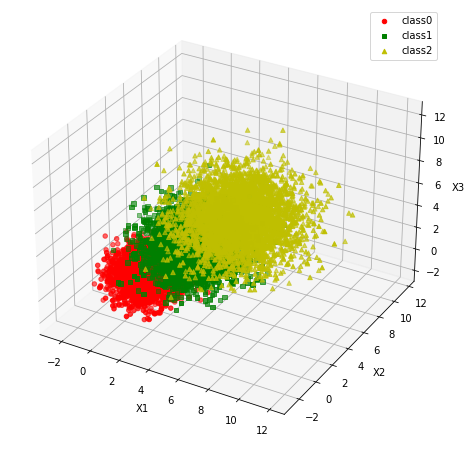

In [63]:
import numpy as np

# 设置类别先验
class_priors = [0.3, 0.3, 0.4]

# 设置每个类别的参数
class_parameters = [
    (np.array([1, 1, 1]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])),
    (np.array([3, 3, 3]), np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])),
    (np.array([5, 5, 5]), np.array([[3, 0, 0], [0, 3, 0], [0, 0, 3]])),
    (np.array([7, 7, 7]), np.array([[4, 0, 0], [0, 4, 0], [0, 0, 4]]))
]

# 生成10000个样本
num_samples = 10000
samples = []
labels = []

for _ in range(num_samples):
    label = np.random.choice(3, p=class_priors)
    
    mean, cov = class_parameters[label]
    sample = np.random.multivariate_normal(mean, cov)
    
    samples.append(sample)
    labels.append(label)

data = samples
true_labels = labels


loss_matrix = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])


# Implement Bayes Classifier with 0-1 loss
def bayes_classifier(sample):
    posterior_probs = [np.exp(-0.5 * np.sum((sample - means[j]) ** 2 / std_devs[j]**2)) / np.prod(std_devs[j]) for j in range(3)]
    return np.argmin(np.dot(posterior_probs, loss_matrix))  # Use np.argmin to minimize the 0-1 loss


# Classify the data
predicted_labels = [bayes_classifier(sample) for sample in data]

# Create a confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label][predicted_label] += 1

# Visualize the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

markers = ['o', 's', '^']
colors = ['g', 'r', 'b','y','c','k']
col=['r','g','y']

for i in range(3):
    class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i])
    correct_class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i and predicted_labels[j] == i])
    incorrect_class_data = class_data[correct_class_data != class_data]

     
    ax.scatter(correct_class_data[:, 0], correct_class_data[:, 1], correct_class_data[:, 2], c=colors[i*2],marker=markers[i],label="class"+str(i)+" correct")
    ax.scatter(incorrect_class_data[:, 0], incorrect_class_data[:, 1], incorrect_class_data[:, 2],c=colors[i*2+1], marker='x',label="class"+str(i)+" incorrect")
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.show()

print("Confusion Matrix:")
print(confusion_matrix)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=45, azim=45)
for i in range(3):
    class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i])
    ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], c=col[i],marker=markers[i],label="class"+str(i))
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')


plt.show()
    
    

/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_1692/2775781896.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_class_data = class_data[correct_class_data != class_data]


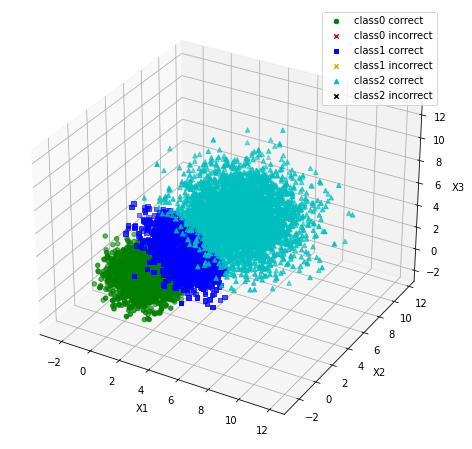

Confusion Matrix:
[[2760  264    0]
 [ 175 1746 1075]
 [   3  185 3792]]


In [64]:
##PartB
loss_matrix = np.array([[0, 10, 10], [1, 0, 10], [1, 1, 0]]) 

# Implement Bayes Classifier with 0-1 loss
def bayes_classifier(sample):
    posterior_probs = [np.exp(-0.5 * np.sum((sample - means[j]) ** 2 / std_devs[j]**2)) / np.prod(std_devs[j]) for j in range(3)]
    return np.argmin(np.dot(posterior_probs, loss_matrix))  # Use np.argmin to minimize the 0-1 loss


# Classify the data
predicted_labels = [bayes_classifier(sample) for sample in data]

# Create a confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label][predicted_label] += 1

# Visualize the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

markers = ['o', 's', '^']
colors = ['g', 'r', 'b','y','c','k']
col=['r','g','y']

for i in range(3):
    class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i])
    correct_class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i and predicted_labels[j] == i])
    incorrect_class_data = class_data[correct_class_data != class_data]

     
    ax.scatter(correct_class_data[:, 0], correct_class_data[:, 1], correct_class_data[:, 2], c=colors[i*2],marker=markers[i],label="class"+str(i)+" correct")
    ax.scatter(incorrect_class_data[:, 0], incorrect_class_data[:, 1], incorrect_class_data[:, 2],c=colors[i*2+1], marker='x',label="class"+str(i)+" incorrect")
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.show()

print("Confusion Matrix:")
print(confusion_matrix)


/var/folders/vc/hp1kfbmj7lb7k9nhyd12slww0000gn/T/ipykernel_1692/583477407.py:28: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  incorrect_class_data = class_data[correct_class_data != class_data]


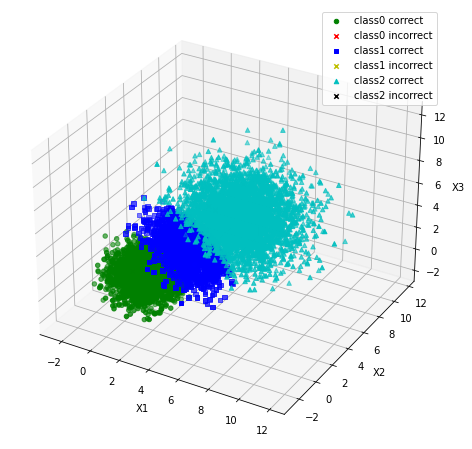

Confusion Matrix:
[[2874  150    0]
 [ 260 1945  791]
 [   3  274 3703]]


In [65]:
loss_matrix = np.array([[0, 100, 100], [1, 0, 100], [1, 1, 0]]) 

# Implement Bayes Classifier with 0-1 loss
def bayes_classifier(sample):
    posterior_probs = [np.exp(-0.5 * np.sum((sample - means[j]) ** 2 / std_devs[j]**2)) / np.prod(std_devs[j]) for j in range(3)]
    return np.argmin(np.dot(posterior_probs, loss_matrix))  # Use np.argmin to minimize the 0-1 loss


# Classify the data
predicted_labels = [bayes_classifier(sample) for sample in data]

# Create a confusion matrix
confusion_matrix = np.zeros((3, 3), dtype=int)
for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label][predicted_label] += 1

# Visualize the data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

markers = ['o', 's', '^']
colors = ['g', 'r', 'b','y','c','k']
col=['r','g','y']

for i in range(3):
    class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i])
    correct_class_data = np.array([data[j] for j in range(num_samples) if true_labels[j] == i and predicted_labels[j] == i])
    incorrect_class_data = class_data[correct_class_data != class_data]

     
    ax.scatter(correct_class_data[:, 0], correct_class_data[:, 1], correct_class_data[:, 2], c=colors[i*2],marker=markers[i],label="class"+str(i)+" correct")
    ax.scatter(incorrect_class_data[:, 0], incorrect_class_data[:, 1], incorrect_class_data[:, 2],c=colors[i*2+1], marker='x',label="class"+str(i)+" incorrect")
ax.legend()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

plt.show()

print("Confusion Matrix:")
print(confusion_matrix)
